In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
init_notebook_mode(connected=True)

import folium
# from geopy.geocoders import Nominatim
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable


import json

import warnings
warnings.filterwarnings(action='ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams['figure.dpi'] = 200 #high resolution

In [2]:

# params = {'figure.dpi':200, #high resolution,
#           'font.family':'serif',
#           'font.sans-serif':'Lucida Grande',
#           'legend.fontsize': '12',
#           'figure.figsize': (18, 8),
#          'axes.labelsize': '13',
#          'axes.titlesize':'16',
#          'xtick.labelsize':'12',
#          'ytick.labelsize':'12'}
# plt.rcParams.update(params)

In [3]:
data_21 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv', low_memory=False)
data_21.shape

(25974, 369)

## Read countries longitude and latitude

In [4]:
# countries lat and long
map_df = pd.read_csv('../input/countries-long-lat/long_lat.csv')
map_df.head()

,Q3,Latitude,Longitude
0,India,22.351115,78.667743
1,Indonesia,-2.483383,117.890285
2,Pakistan,30.330840,71.247499
3,Mexico,22.500048,-100.000037
4,Russia,64.686314,97.745306


## Check the data

In [5]:
data_21.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B

## What are the 10 countries with the most respondents?

In [6]:
df = data_21.iloc[1:]['Q3'].value_counts()[:10]
ax = px.pie(df, values=df.values, names=list(df.index), 
             color_discrete_sequence=["#95101f","#a82820", "#ba3d1f","#cb511d", "#d45d00","#dc6818", "#e87a13","#f4900a","#ffa600", "#f6a800"], 
             hole=.35,
             title='Percentage of total respondents of top 10 countries in 2021',             
            )

ax.update_traces(hovertemplate = "%{label}: <b>%{value}</b>", textfont_size=14)
ax.update_layout(
    hoverlabel=dict(
        bgcolor="white",
#         font_size=16,
#         font_family="Serif",
    ),
    margin=dict(l=20, r=20, t=50, b=20),
#     title_font_family="Serif",
)
ax.show()

## Which machine learning algorithms are used frequently? 

In [7]:
q18_dictionary_of_counts_2021 = {
    data_21['Q18_Part_1'][0].split('- ')[-1] : (data_21['Q18_Part_1'].count()),
    data_21['Q18_Part_2'][0].split('- ')[-1] : (data_21['Q18_Part_2'].count()),
    data_21['Q18_Part_3'][0].split('- ')[-1] : (data_21['Q18_Part_3'].count()),
    data_21['Q18_Part_4'][0].split('- ')[-1] : (data_21['Q18_Part_4'].count()),
    data_21['Q18_Part_5'][0].split('- ')[-1] : (data_21['Q18_Part_5'].count()),
    data_21['Q18_Part_6'][0].split('- ')[-1] : (data_21['Q18_Part_6'].count()),
    data_21['Q18_OTHER'][0].split('- ')[-1] : (data_21['Q18_OTHER'].count())
}
# q18_dictionary_of_counts_2021

In [8]:
q17_dictionary_of_counts_2021 = {
    data_21['Q17_Part_1'][0].split('- ')[-1] : (data_21['Q17_Part_1'].count()),
    data_21['Q17_Part_2'][0].split('- ')[-1] : (data_21['Q17_Part_2'].count()),
    data_21['Q17_Part_3'][0].split('- ')[-1] : (data_21['Q17_Part_3'].count()),
    data_21['Q17_Part_4'][0].split('- ')[-1] : (data_21['Q17_Part_4'].count()),
    data_21['Q17_Part_5'][0].split('- ')[-1] : (data_21['Q17_Part_5'].count()),
    data_21['Q17_Part_6'][0].split('- ')[-1] : (data_21['Q17_Part_6'].count()),
    data_21['Q17_Part_7'][0].split('- ')[-1] : (data_21['Q17_Part_7'].count()),
    data_21['Q17_Part_8'][0].split('- ')[-1] : (data_21['Q17_Part_8'].count()),
    data_21['Q17_Part_9'][0].split('- ')[-1] : (data_21['Q17_Part_9'].count()),
    data_21['Q17_Part_10'][0].split('- ')[-1] : (data_21['Q17_Part_10'].count()),
    data_21['Q17_Part_11'][0].split('- ')[-1] : (data_21['Q17_Part_11'].count()),
    data_21['Q17_OTHER'][0].split('- ')[-1] : (data_21['Q17_OTHER'].count())
}
# q17_dictionary_of_counts_2021

In [9]:
fig = px.scatter(
    x=q17_dictionary_of_counts_2021.keys(), 
    y=q17_dictionary_of_counts_2021.values(), 
    title='ML algorithms that are used on a regular basis',
    size=q17_dictionary_of_counts_2021.values(), 
    color_discrete_sequence=['#FF5F01'],
)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_size':20,
    },
    hoverlabel=dict(
    font_color="white",
)
    ,
    xaxis_title="ML Algorithms",
    yaxis_title="Number of respondants using the algorithms",
#     title_font_family="Serif",
    plot_bgcolor='rgba(0,0,0,0)'
    )
fig.show()

## How many people aged below 50 are attented among the top 10 countries?

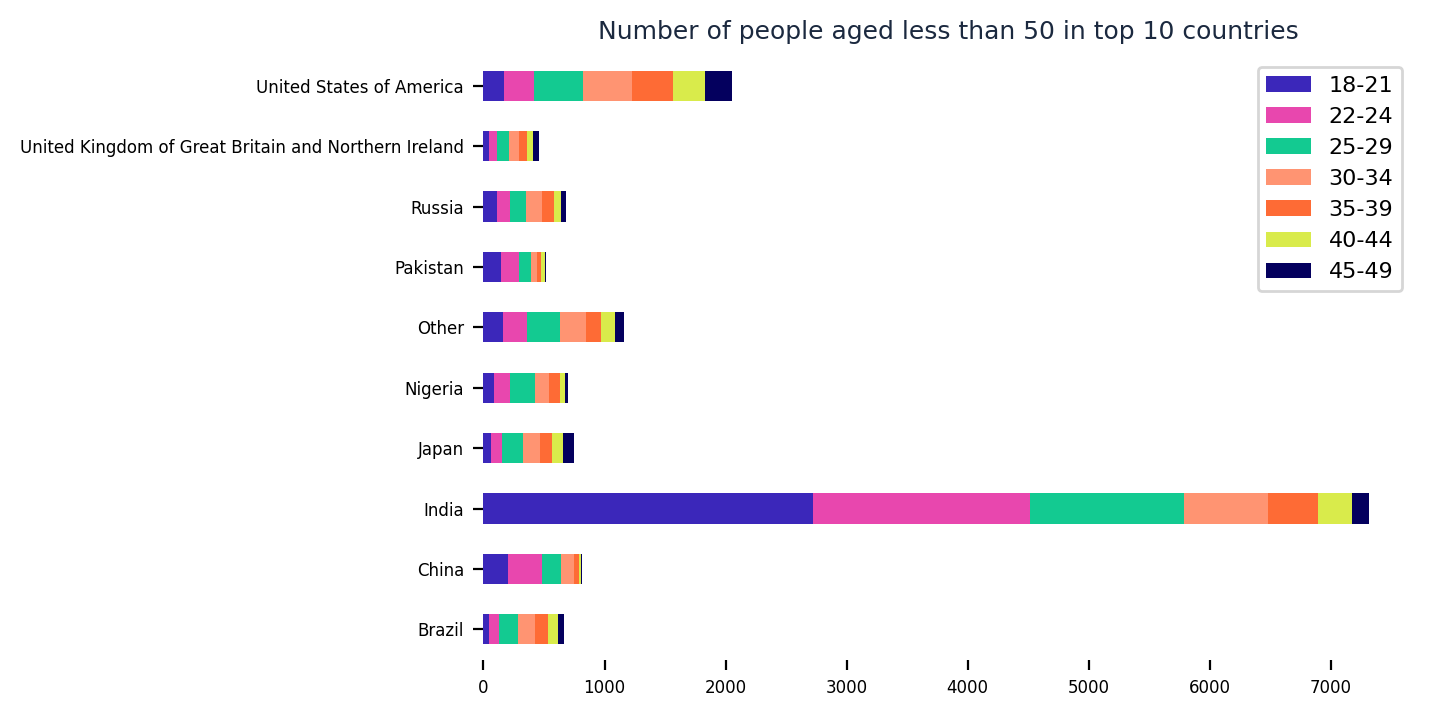

In [10]:
labels=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49']
tmp_df = data_21[data_21['Q3'].isin(data_21.iloc[1:]['Q3'].value_counts()[:10].index)][['Q1','Q2','Q3']]
tmp_df = tmp_df[tmp_df['Q1'].isin(labels)]
tmp_df.groupby(by=['Q3','Q1']).agg(['count'])['Q2'].unstack().fillna(value=0).plot(
    kind='barh', stacked=True,
    color=["#3B27BA","#E847AE", "#13CA91", "#FF9472", "#FE6B35","#D9EB4B", "#04005E"],
    )
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.title('Number of people aged less than 50 in top 10 countries', fontsize=9, color='#1b293f')
plt.legend(labels=labels, prop={'size':8})
plt.ylabel('')
plt.xticks(fontsize= 6)
plt.yticks(fontsize= 6)

plt.show()

## Their coding experience

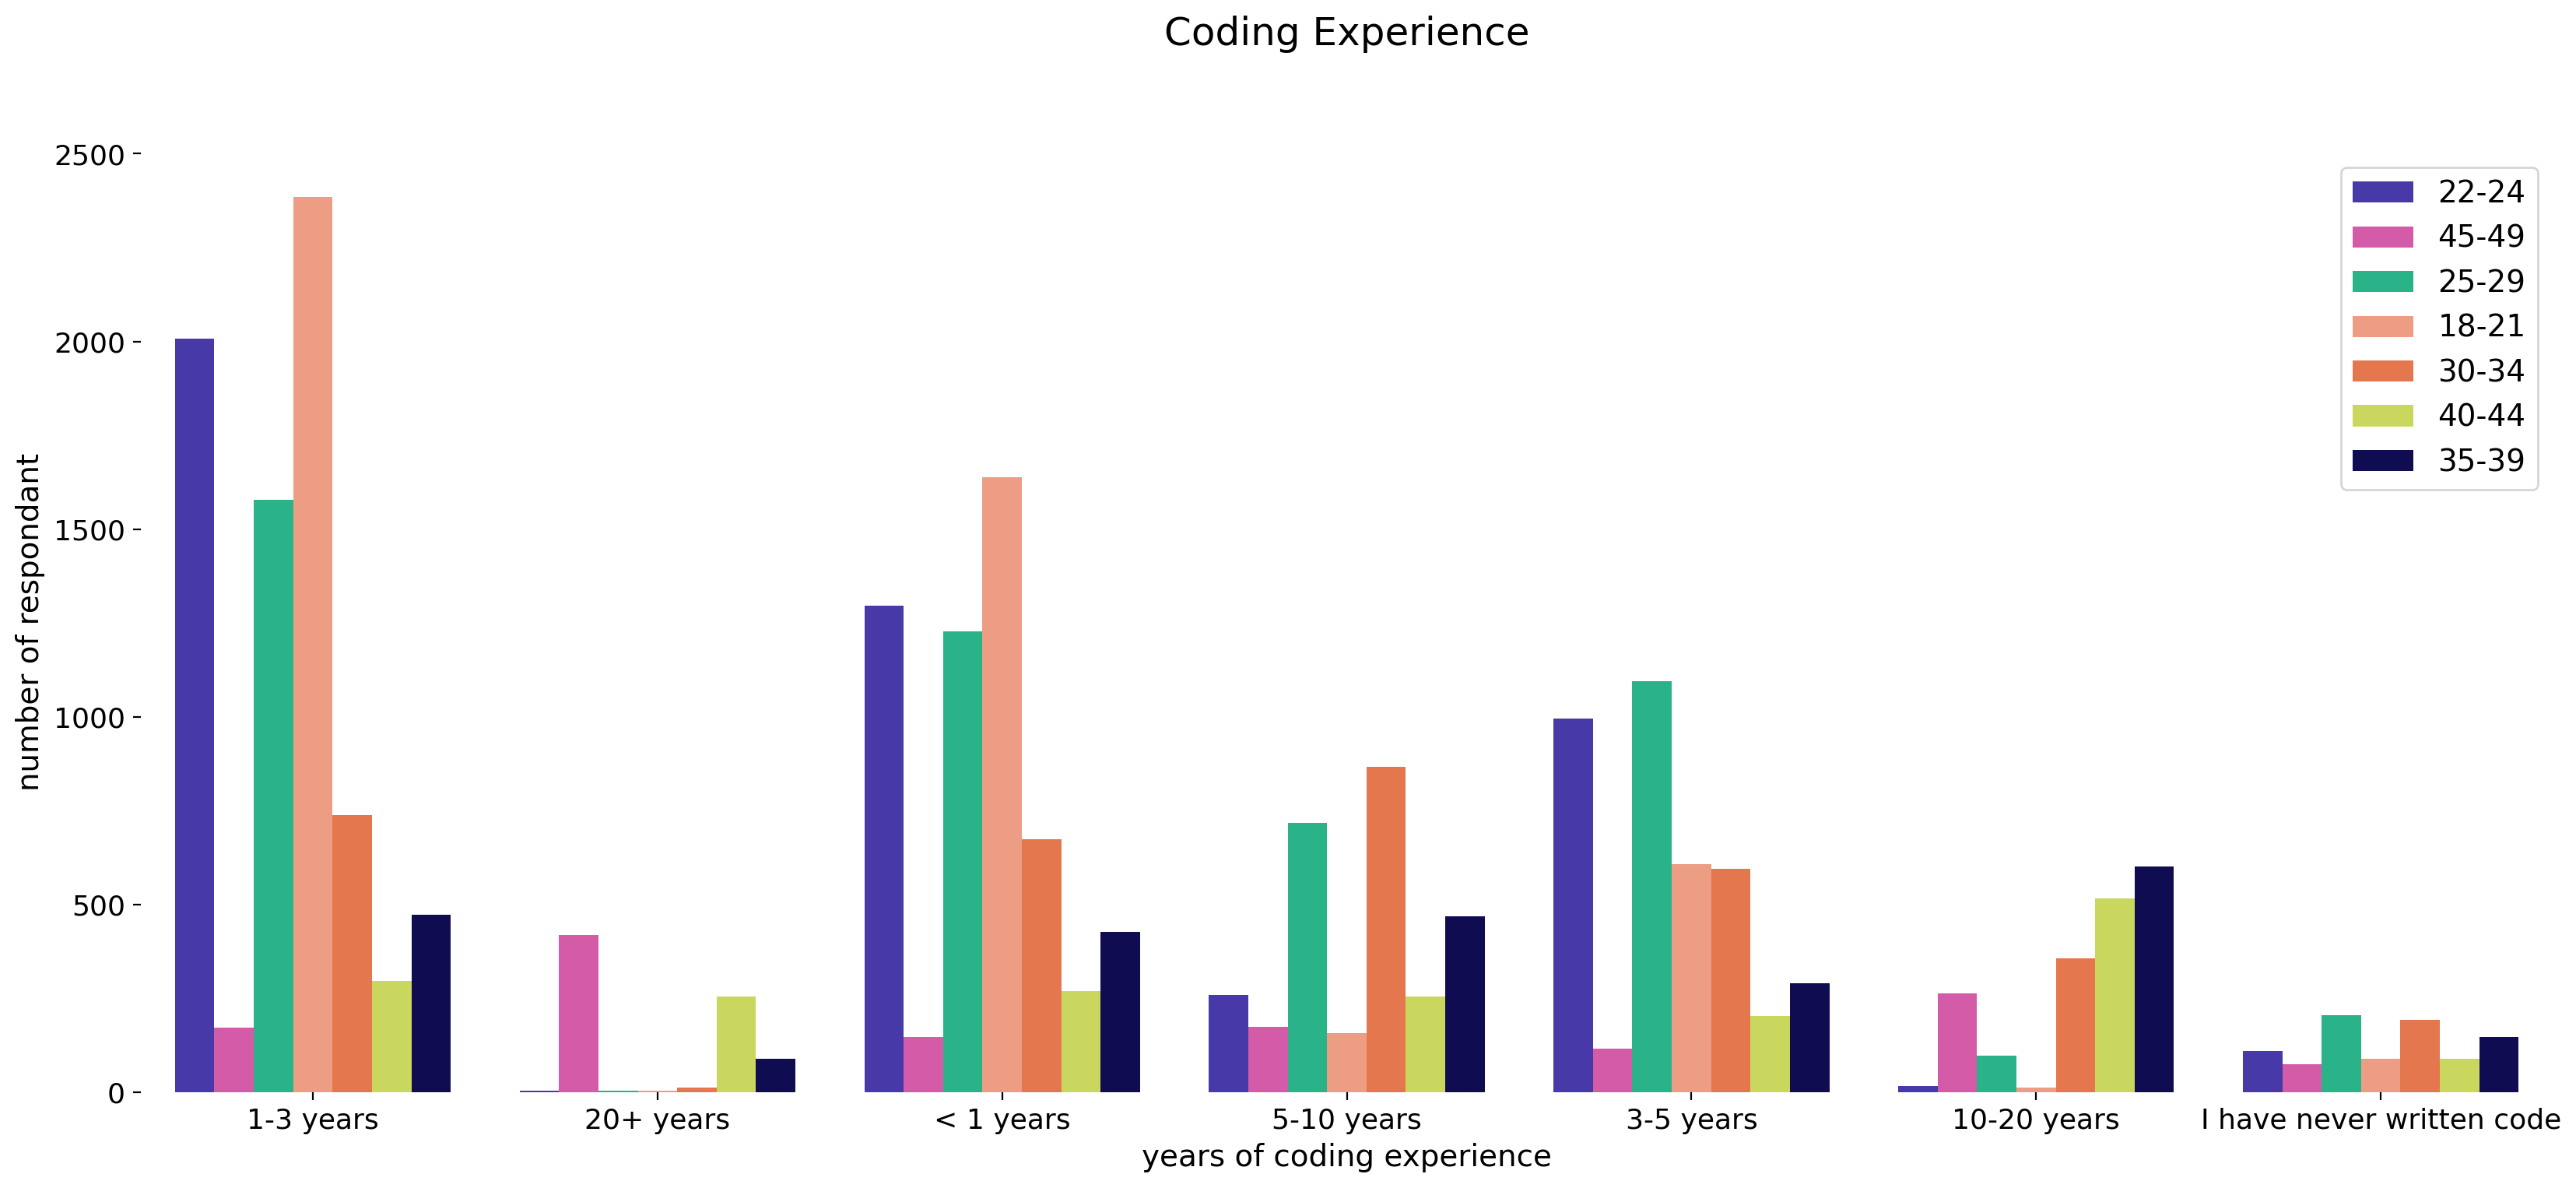

In [11]:
plt.figure(figsize=(20,8))

labels=['18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49']

tmp_df = data_21.drop(index=0)[data_21['Q1'].isin(labels)]
sns.countplot(x = 'Q6', hue = 'Q1', data = tmp_df, 
              palette=["#3B27BA","#E847AE", "#13CA91", "#FF9472", "#FE6B35","#D9EB4B", "#04005E"])
# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
plt.title('Coding Experience', loc='center', y=1.1, fontsize=18)
plt.legend(prop={'size':14})
plt.xlabel('years of coding experience', fontsize=14)
plt.ylabel('number of respondant', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

## Their machine learning experience

In [12]:
def create_map_df(df,col1,col2):
    
    df = df.iloc[1:]
    df.replace({col2:{'I do not use machine learning methods':'not use ML methods',
                     '20 or more years':'+20 years', 'Under 1 year':'>1 year'}}, inplace=True)
    df = pd.DataFrame(df[[col1, col2, 'Latitude', 'Longitude']]).groupby([col1, col2,'Latitude', 'Longitude']).size().reset_index(name='count')
    df[col2] = df[col2] + ": " + df['count'].astype(str)
    map_data = pd.DataFrame(df[col2].groupby([df[col1]]).apply(list).reset_index()) 
    map_data = pd.merge(map_data,df[[col1,'Latitude', 'Longitude']],on=col1, how='left')
    map_data = map_data.drop_duplicates(subset = [col1]).reset_index()
    
    world_map= folium.Map(tiles="Stamen Toner")
    mc = MarkerCluster()
    for idx, row in map_data.iterrows():
        if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
            tooltip = 'Click on it'
            popup_text = """
            Country : <b>%s</b><br>
            ML Experience : <b>%s</b><br>
            """ % (row['Q3'], row['Q15'])

#             iframe = folium.IFrame(html)
            popup = folium.Popup(popup_text,
                                 min_width=200,
                                 max_width=200)
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=tooltip, popup=popup,
                            icon=folium.Icon(color='red',icon='info-sign')))
    
        world_map.add_child(mc)
    
    return world_map

df = pd.merge(data_21, map_df, on = 'Q3', how = 'left')
wmap = create_map_df(df, 'Q3', 'Q15')
wmap

## How many years have the respondents used machine learning methods based on their job role?

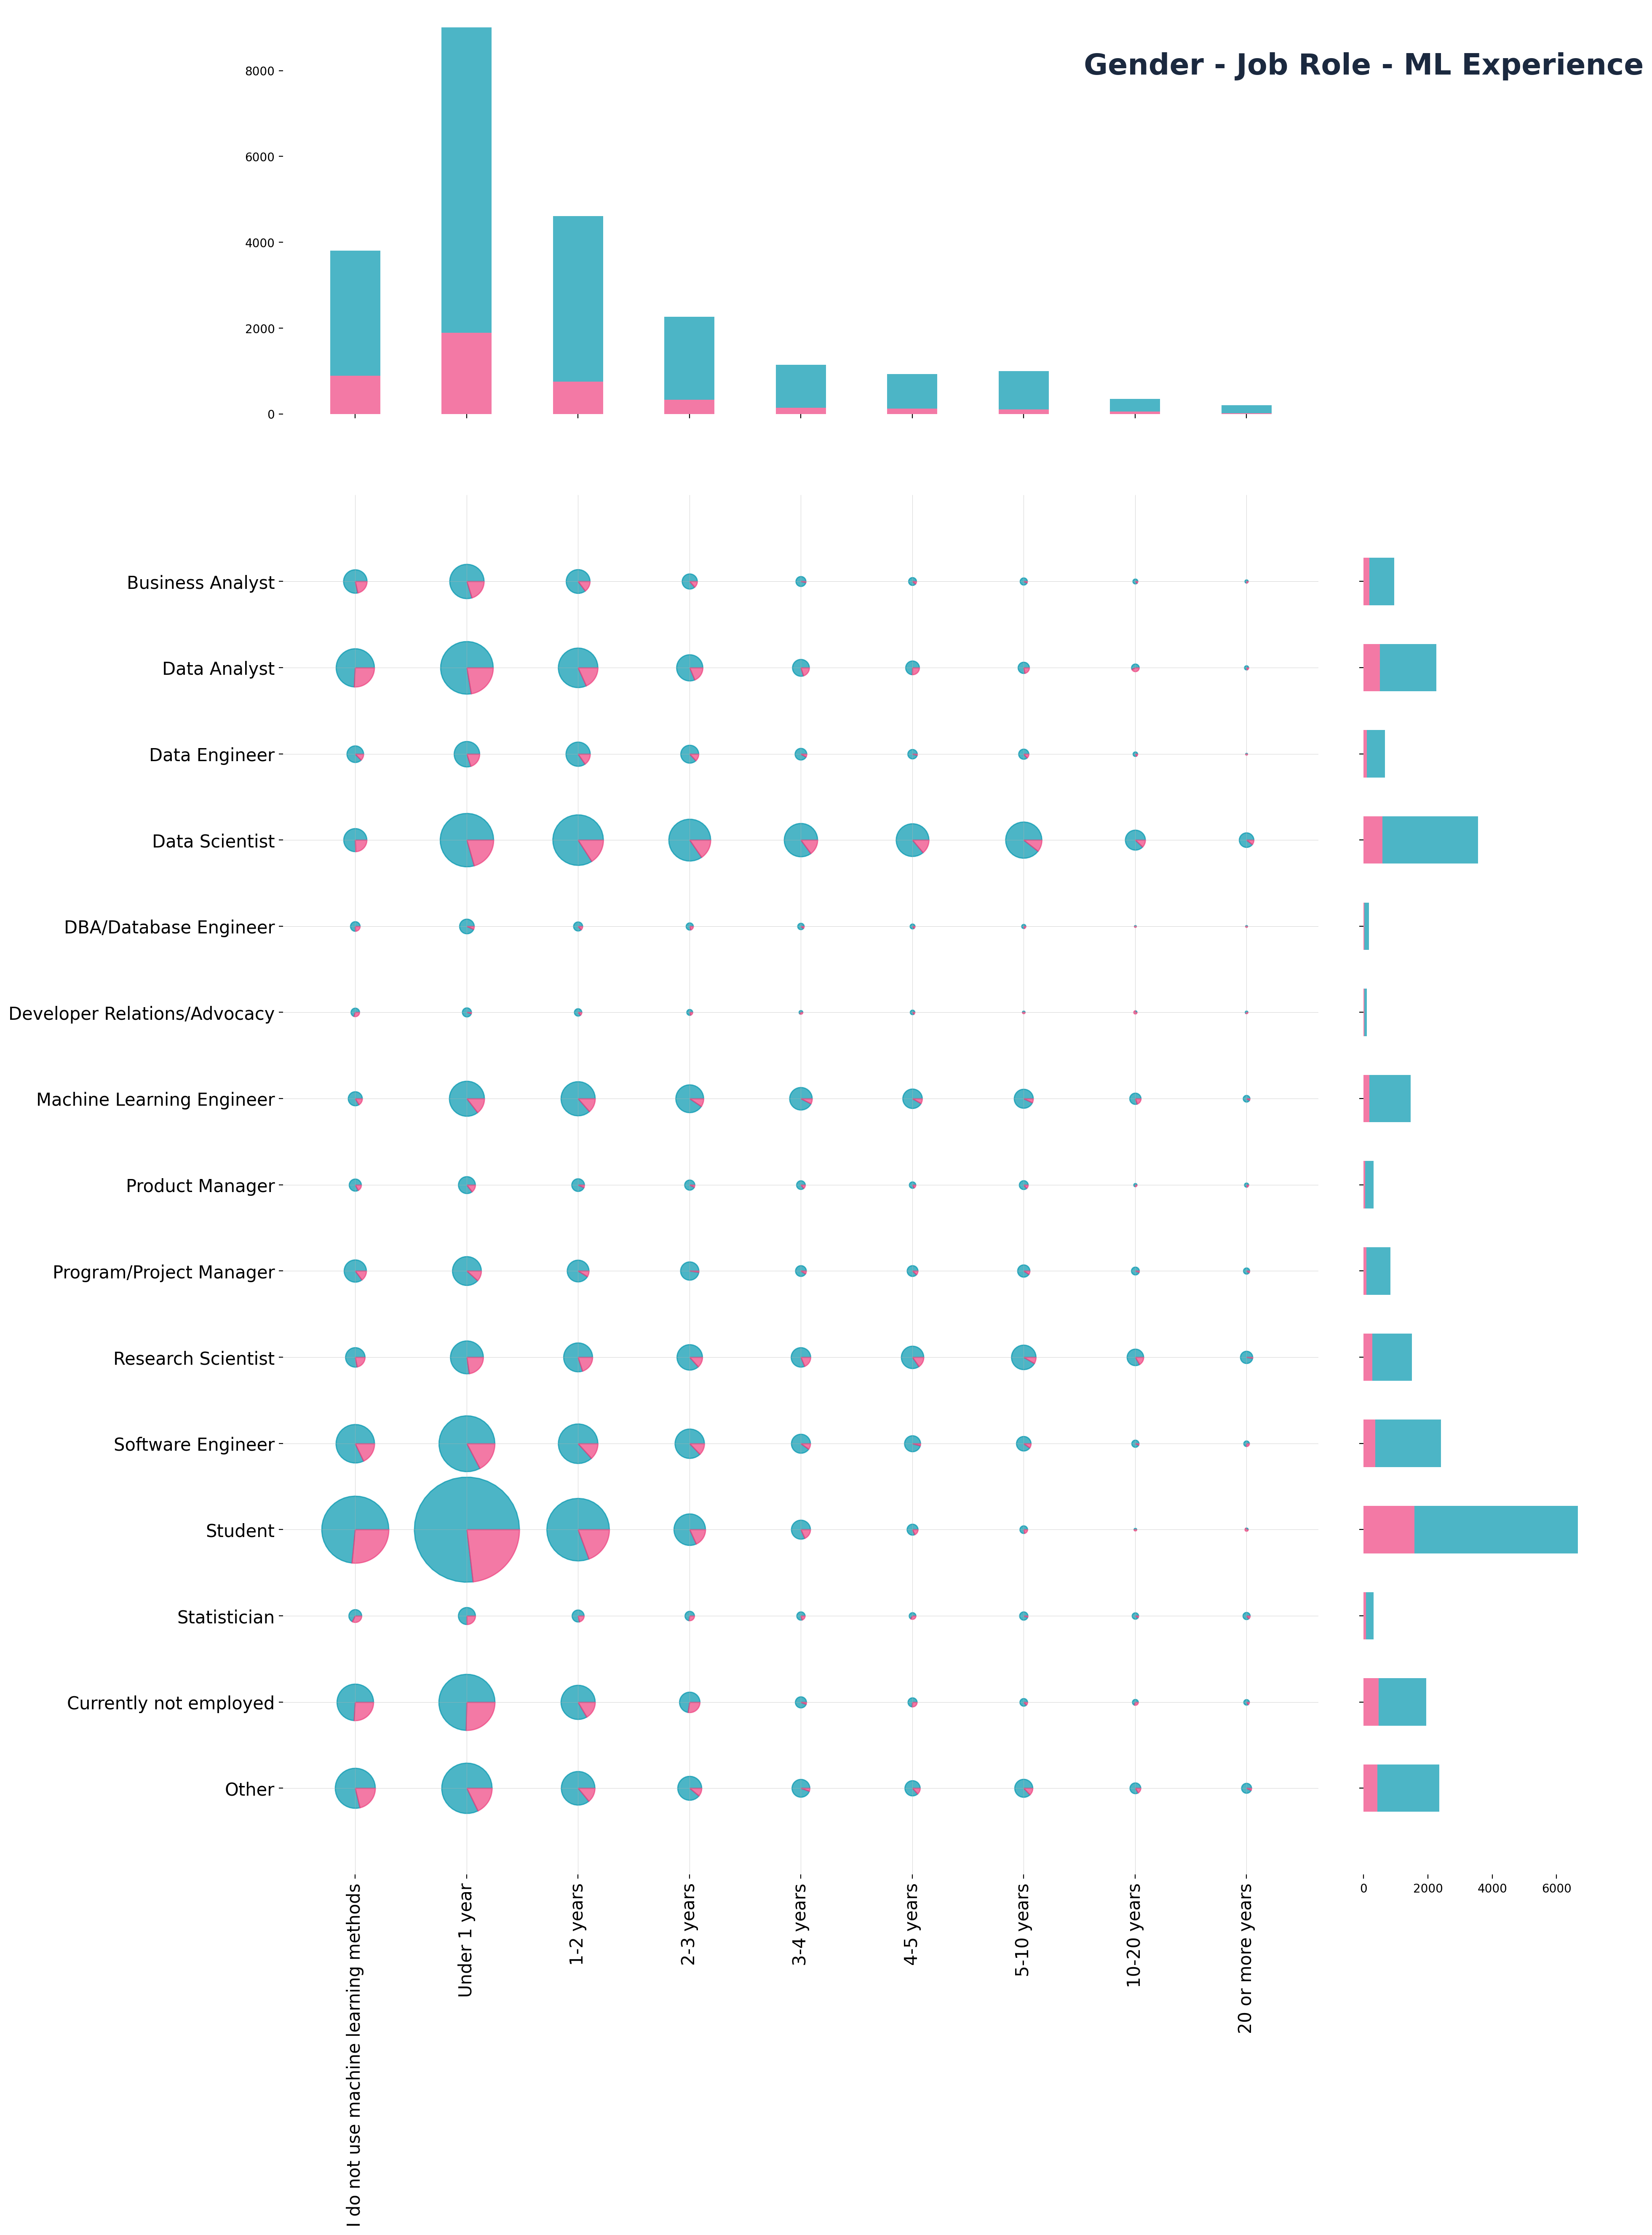

In [13]:
def drawPieMarker(xs, ys, ratios, sizes, colors, ax):
    markers = []
    previous = 0
    # calculate the points of the pie pieces
    for color, ratio in zip(colors, ratios):
        this = 2 * np.pi * ratio + previous
        x  = [0] + np.cos(np.linspace(previous, this, 30)).tolist() + [0]
        y  = [0] + np.sin(np.linspace(previous, this, 30)).tolist() + [0]
        xy = np.column_stack([x, y])
        previous = this
        markers.append({'marker':xy, 's':np.abs(xy).max()**2*np.array(sizes), 'facecolor':color})

    # scatter each of the pie pieces to create pies
    for marker in markers:
        ax.scatter(xs, ys, **marker, alpha=0.7)


q5_order = ['Business Analyst',
            'Data Analyst',
            'Data Engineer',
            'Data Scientist',
            'DBA/Database Engineer',
            'Developer Relations/Advocacy',
            'Machine Learning Engineer',
            'Product Manager',
            'Program/Project Manager',
            'Research Scientist',
            'Software Engineer', 
            'Student',
            'Statistician',
            'Currently not employed',
            'Other']

q15_order = ['I do not use machine learning methods',
             'Under 1 year',
             '1-2 years',
             '2-3 years',
             '3-4 years',
             '4-5 years',
             '5-10 years',
             '10-20 years',
             '20 or more years']



# data_q5q15 = pd.pivot_table(data_21, values=['count'], index=['Q5'], columns=['Q15'], 
#                             aggfunc={'count':np.sum}).fillna(0).astype(int).loc[q5_order, q15_order].stack()

# aggregate basis cat data for age and gender
data_q5q15 = data_21.groupby(['Q5', 'Q15']).size().reset_index(name='count').rename(
    columns={
        'Q5': 'Role', 
        'Q15': 'ML_experience', 
    }).set_index('Role')

# data_q5q15_man = pd.pivot_table(data_21[data_21['Q2']=='Man'], values='count', index=['Q5'], 
#                                 columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()

data_q5q15_man = data_21[data_21['Q2']=='Man'].groupby(['Q5', 'Q15']).size().reset_index(name='count').rename(
    columns={
        'Q5': 'Role', 
        'Q15': 'ML_experience', 
    }).set_index('Role')

# data_q5q15_woman = pd.pivot_table(data_21[data_21['Q2']=='Woman'], values='count', index=['Q5'], 
#                                   columns=['Q15'], aggfunc=np.sum).fillna(0).astype(int).loc[q5_order, q15_order].stack()


data_q5q15_woman = data_21[data_21['Q2']=='Woman'].groupby(['Q5', 'Q15']).size().reset_index(name='count').rename(
    columns={
        'Q5': 'Role', 
        'Q15': 'ML_experience', 
    }).set_index('Role')

fig = plt.figure(figsize=(20, 37), dpi=200)

gs = fig.add_gridspec(5, 5)



ax_plot = fig.add_subplot(gs[1:4, 0:4]) 
for q5_idx in q5_order[::-1]:
    for q15_idx in q15_order:
#         man = data_q5q15_man[q5_idx][q15_idx]

        try:
            man = data_q5q15_man[data_q5q15_man['ML_experience'] == q15_idx].loc[q5_idx,'count']
        except KeyError:
            man = 1
#         woman = data_q5q15_woman[q5_idx][q15_idx]
        try:
            woman = data_q5q15_woman[data_q5q15_woman['ML_experience'] == q15_idx].loc[q5_idx,'count']
        except KeyError:
            woman = 1
#         tot = data_q5q15[q5_idx][q15_idx]
        try:
            tot = data_q5q15[data_q5q15['ML_experience'] == q15_idx].loc[q5_idx,'count']
        except KeyError:
            tot = 1
            
#         print('man', man, 'woman', woman,'total', tot)
        drawPieMarker([q15_idx],[q5_idx], [man/(man+woman), woman/(man+woman)] ,
                      [tot*2.5], ['#0096af', '#ee417f'], ax=ax_plot)



# Pos
ax_pos = fig.add_subplot(gs[0, :4], sharex=ax_plot) 
data_q15_woman = data_21[data_21['Q2']=='Woman']['Q15'].value_counts()[q15_order]
ax_pos.bar(data_q15_woman.index, data_q15_woman, width=0.45, alpha=0.7, color='#ee417f')

data_q15_man = data_21[data_21['Q2']=='Man']['Q15'].value_counts()[q15_order]
ax_pos.bar(data_q15_man.index, data_q15_man, bottom=data_q15_woman , width=0.45, alpha=0.7, color='#0096af')

plt.setp(ax_pos.get_xticklabels(), visible=False)


# Exp
ax_exp = fig.add_subplot(gs[1:4, 4], sharey=ax_plot) 

data_q5_woman = data_21[data_21['Q2']=='Woman']['Q5'].value_counts()[q5_order]
ax_exp.barh(data_q5_woman.index[::-1], data_q5_woman[::-1], height=0.55, alpha=0.7, color='#ee417f')

data_q5_man = data_21[data_21['Q2']=='Man']['Q5'].value_counts()[q5_order]
ax_exp.barh(data_q5_man.index[::-1], data_q5_man[::-1], left= data_q5_woman[::-1],height=0.55, alpha=0.7, color='#0096af')

plt.setp(ax_exp.get_yticklabels(), visible=False)

# Spines
for s in ['top', 'left', 'right', 'bottom']:
    ax_plot.spines[s].set_visible(False)
    ax_pos.spines[s].set_visible(False)
    ax_exp.spines[s].set_visible(False)
    
ax_plot.grid(linewidth=0.2, zorder=0)   
# ax_plot.set_aspect('equal')
q5_order.reverse()
ax_plot.set_yticklabels(q5_order,  fontsize=15)
ax_plot.set_xticklabels(q15_order, fontsize=15, rotation=90)

plt.title('Gender - Job Role - ML Experience', fontweight='bold', fontsize=25, color='#1b293f', y=1.3,x=0) 
# fig.text(0.8, 0.88, 'Stacked Bar Chart + Categorical Bubble Pie Chart', fontweight='light', fontfamily='serif', 
#          fontsize=20, ha='right')
# plt.tight_layout()
plt.show()


## What is the highest level of education that the respondents have attained or plan to attain within the next 2 years based on their gender?

In [14]:
# aggregate basis cat data for age and gender
agg_data = data_21[1:].groupby(['Q2', 'Q4']).size().reset_index(name='respondent_count')

agg_data = agg_data.rename(
    columns={
        'Q4': 'education', 
        'Q2': 'gender', 
    })
# agg_data.groupby('gender').head()

In [15]:
#Country Age and Average Salary chart
# sal_country=survey[survey['Q24'] !='No Data']
sal_country=agg_data.copy()
sal_country=sal_country.groupby(['gender', 'education']).agg('sum').reset_index()
# sal_country=sal_country.round({'Salary': 1, 'Average Age': 1})
fig = px.scatter(sal_country, x="education", y="gender", size="respondent_count", color="gender",
                 color_continuous_scale='inferno',title='Kaggle 2021: Average Age and Salary by Country (hover for details)',
           hover_name="gender",  size_max=40)
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split("=")[1]
    fig.update_xaxes(showticklabels=True)
    fig.layout.showlegend = False
fig.show()

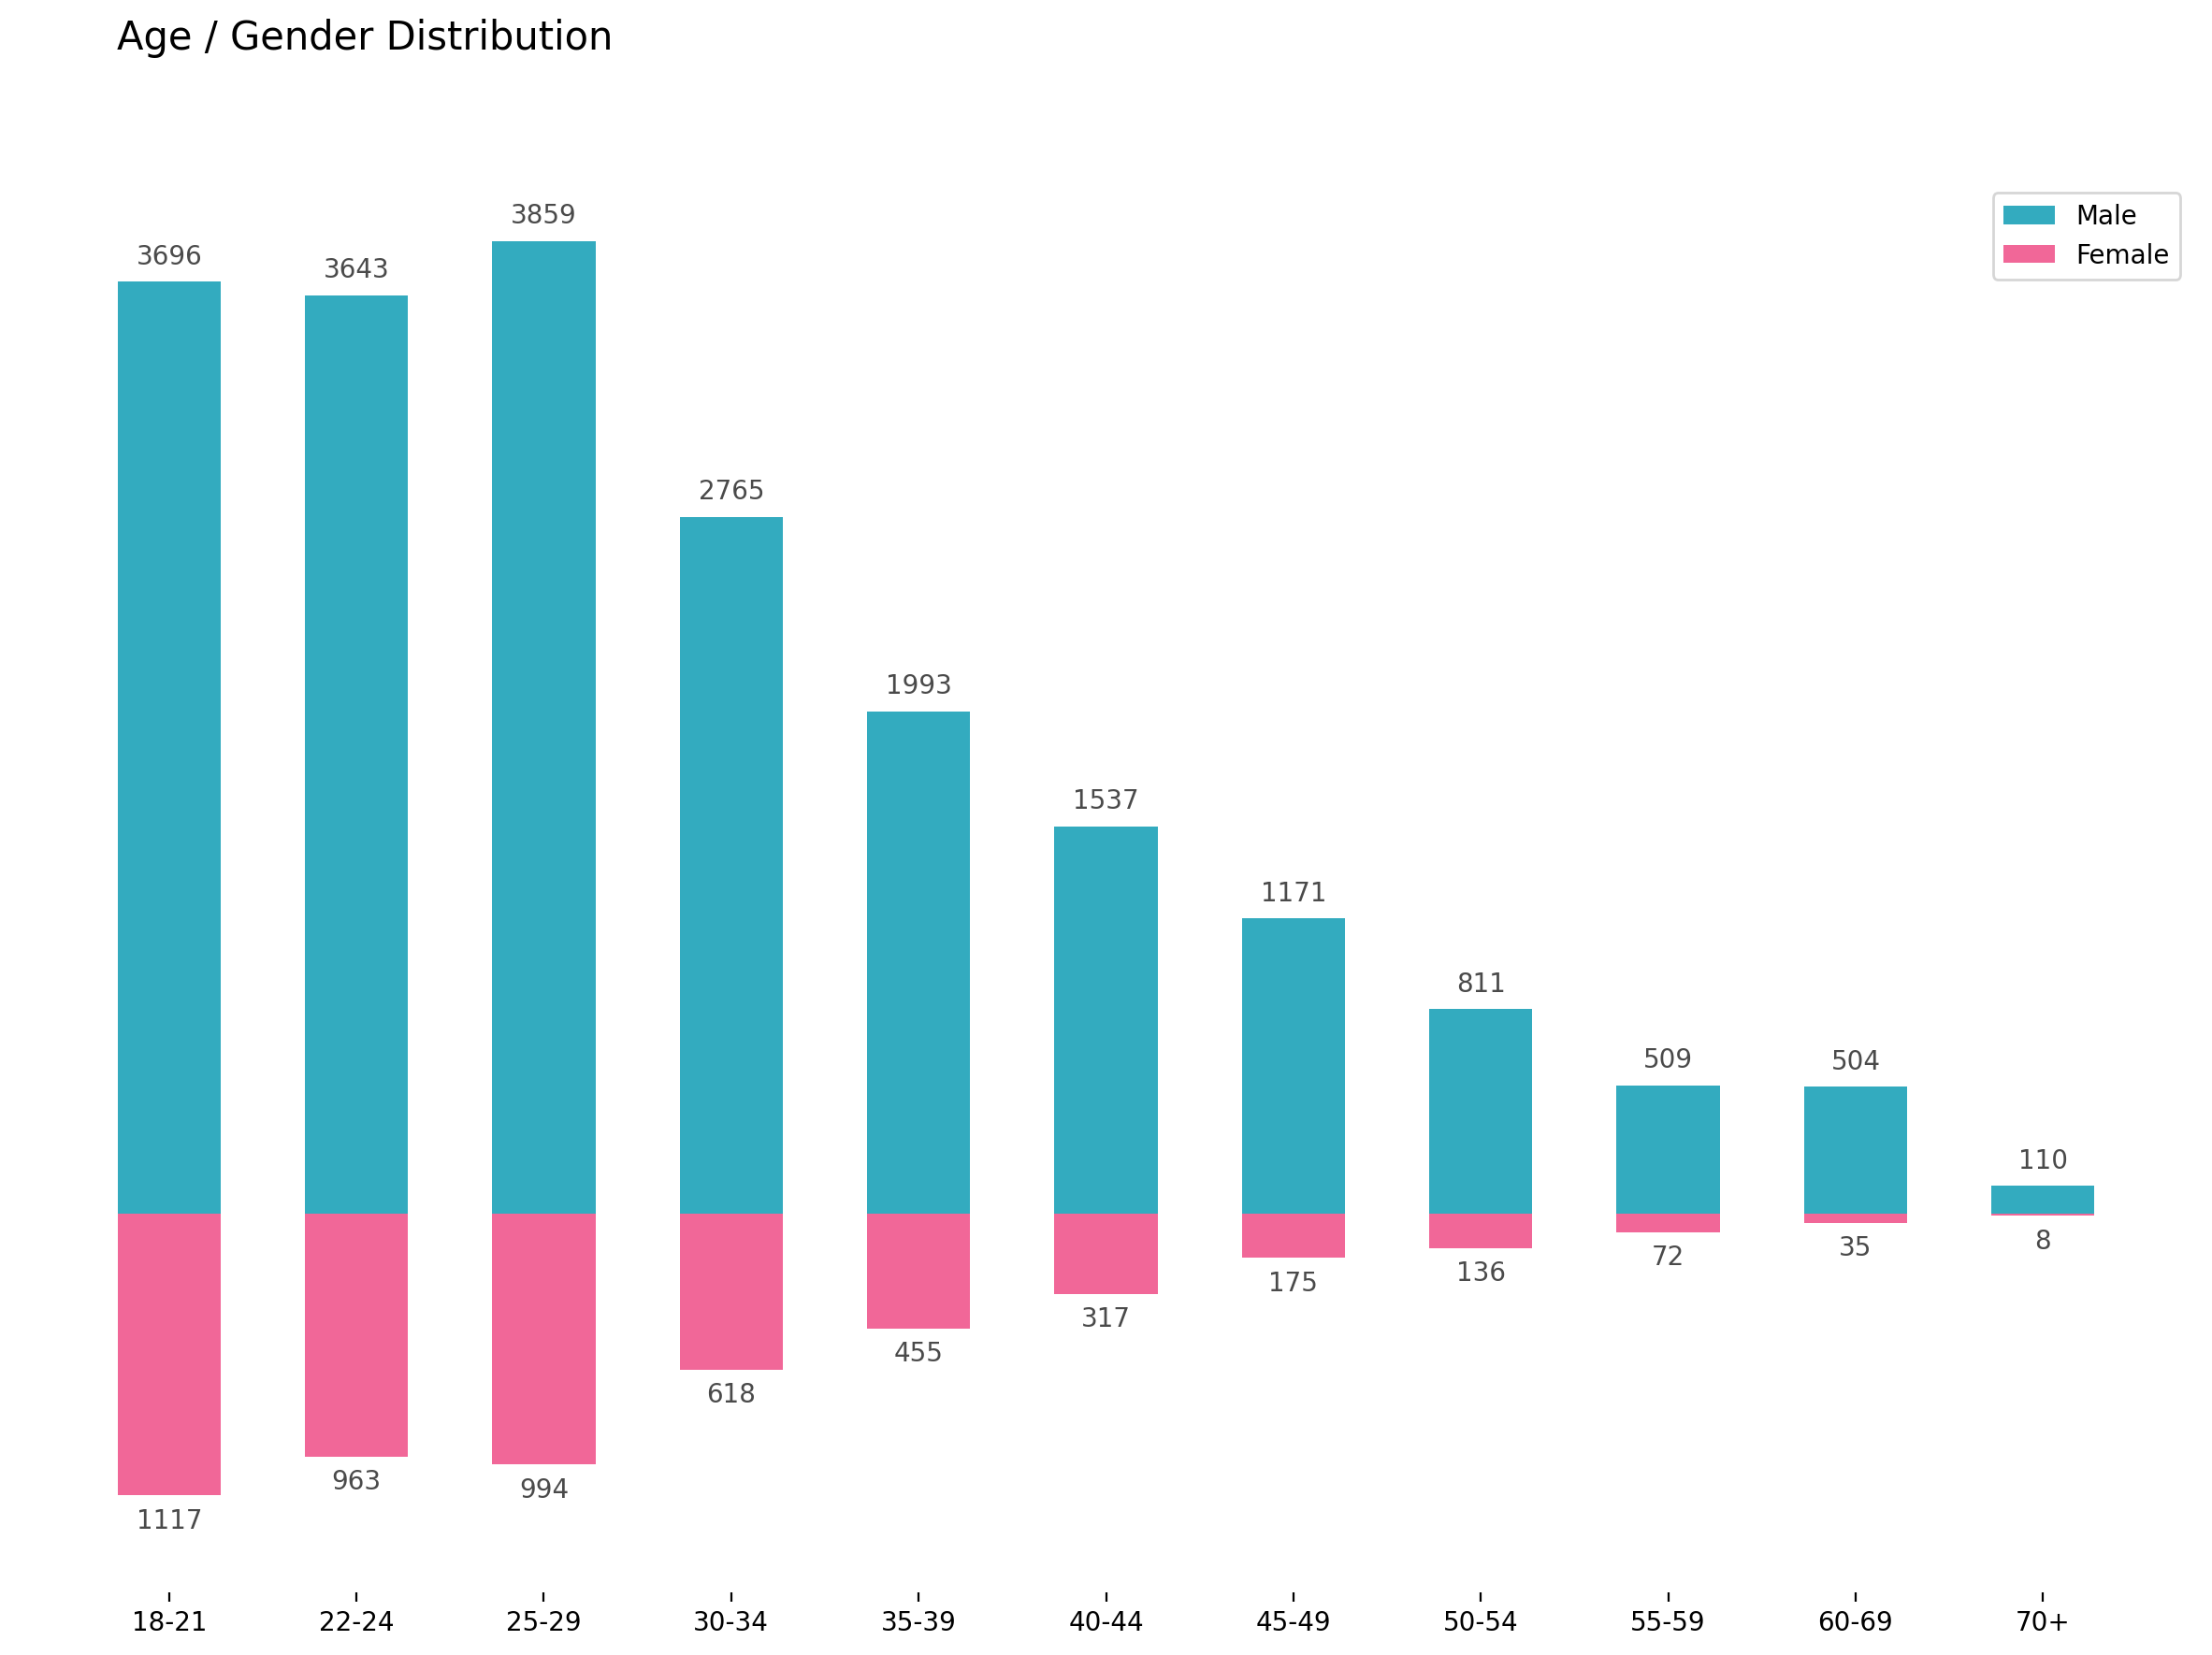

In [16]:
# Q2 Analysis
data = data_21.copy()
data['Q2'] = data['Q2'].apply(lambda x : 'ETC' if x not in ['Man', 'Woman'] else x)
data_q1q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig, ax = plt.subplots(1,1, figsize=(15, 10))
ax.bar(man.index, man, width=0.55, color='#0096af', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#ee417f', alpha=0.8, label='Female')
ax.set_ylim(-1500, 4100)

for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light',color='#4a4a4a')# fontfamily='serif',
                   
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light', color='#4a4a4a') #, fontfamily='serif',
                     

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns,)# fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15)#, fontweight='bold', fontfamily='serif')    
plt.show()

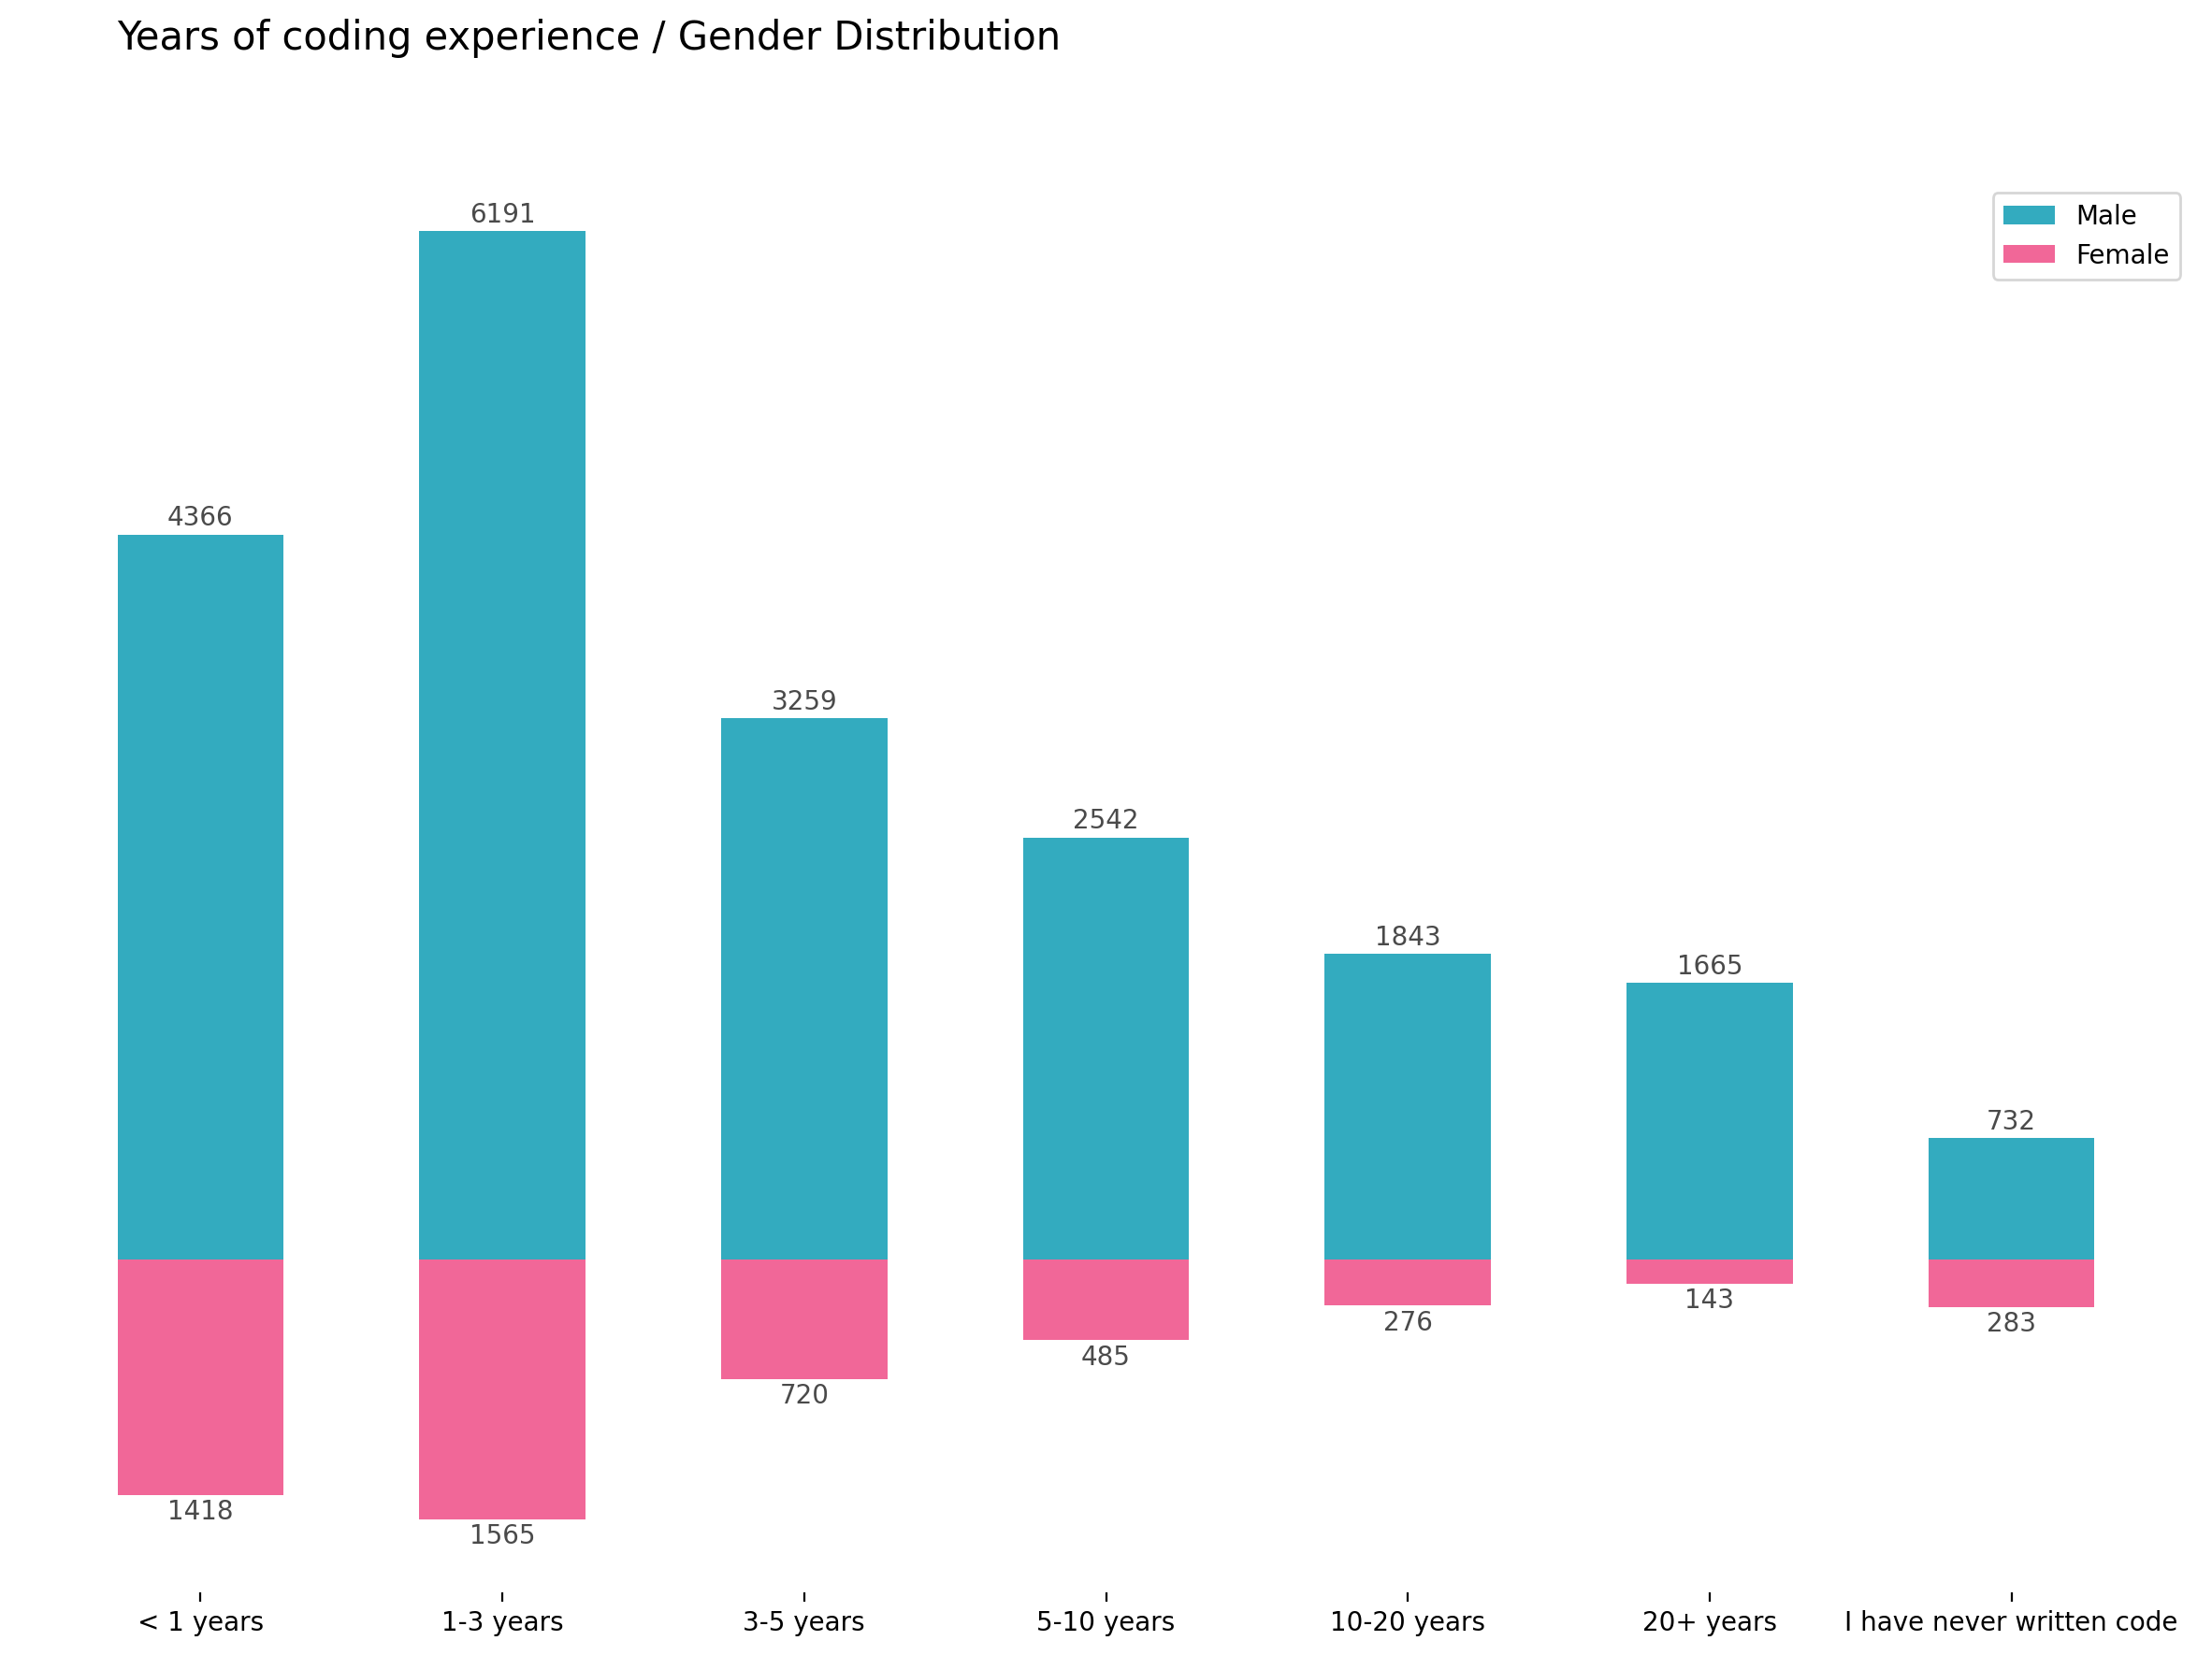

In [17]:
# Q2 Analysis
data = data_21.copy()
data['Q2'] = data['Q2'].apply(lambda x : 'ETC' if x not in ['Man', 'Woman'] else x)
q6_order = ['< 1 years', '1-3 years', '3-5 years', '5-10 years', '10-20 years',
           '20+ years', 'I have never written code']
data_q6q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q6'].value_counts().unstack().sort_index()[q6_order]
man = data_q6q2.loc['Man']
woman = -data_q6q2.loc['Woman']

fig, ax = plt.subplots(1,1, figsize=(15, 10))
ax.bar(man.index, man, width=0.55, color='#0096af', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#ee417f', alpha=0.8, label='Female')
ax.set_ylim(-2000, 6500)

for i in man.index:
    ax.annotate(f"{man[i]}", 
                   xy=(i, man[i] + 100),
                   va = 'center', ha='center',fontweight='light',color='#4a4a4a')# fontfamily='serif',
                   
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", 
                   xy=(i, woman[i] - 100),
                   va = 'center', ha='center',fontweight='light',color='#4a4a4a')# fontfamily='serif',
                  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q6q2.columns)#, fontfamily='serif')
ax.set_yticks([])    
ax.legend()
fig.text(0.16, 0.95, 'Years of coding experience / Gender Distribution', fontsize=15,) 
#         fontweight='bold', fontfamily='serif')    
plt.show()

## Which activities are an important part of job?

In [18]:
# col_24 = [col for col in data_21.columns if 'Q24' in col]
# for c in col_24:
#     print(data_21.loc[1:,c].value_counts())

In [19]:
q24_dictionary_of_counts_2021 = {
    data_21['Q24_Part_1'][0].split('- ')[-1] : (data_21['Q24_Part_1'].count()-1),
    data_21['Q24_Part_2'][0].split('- ')[-1] : (data_21['Q24_Part_2'].count()-1),
    data_21['Q24_Part_3'][0].split('- ')[-1] : (data_21['Q24_Part_3'].count()-1),
    data_21['Q24_Part_4'][0].split('- ')[-1] : (data_21['Q24_Part_4'].count()-1),
    data_21['Q24_Part_5'][0].split('- ')[-1] : (data_21['Q24_Part_5'].count()-1),
    data_21['Q24_Part_6'][0].split('- ')[-1] : (data_21['Q24_Part_6'].count()-1),
    data_21['Q24_Part_7'][0].split('- ')[-1] : (data_21['Q24_Part_7'].count()-1),
    data_21['Q24_OTHER'][0].split('- ')[-1] : (data_21['Q24_OTHER'].count()-1)
}
# q24_dictionary_of_counts_2021

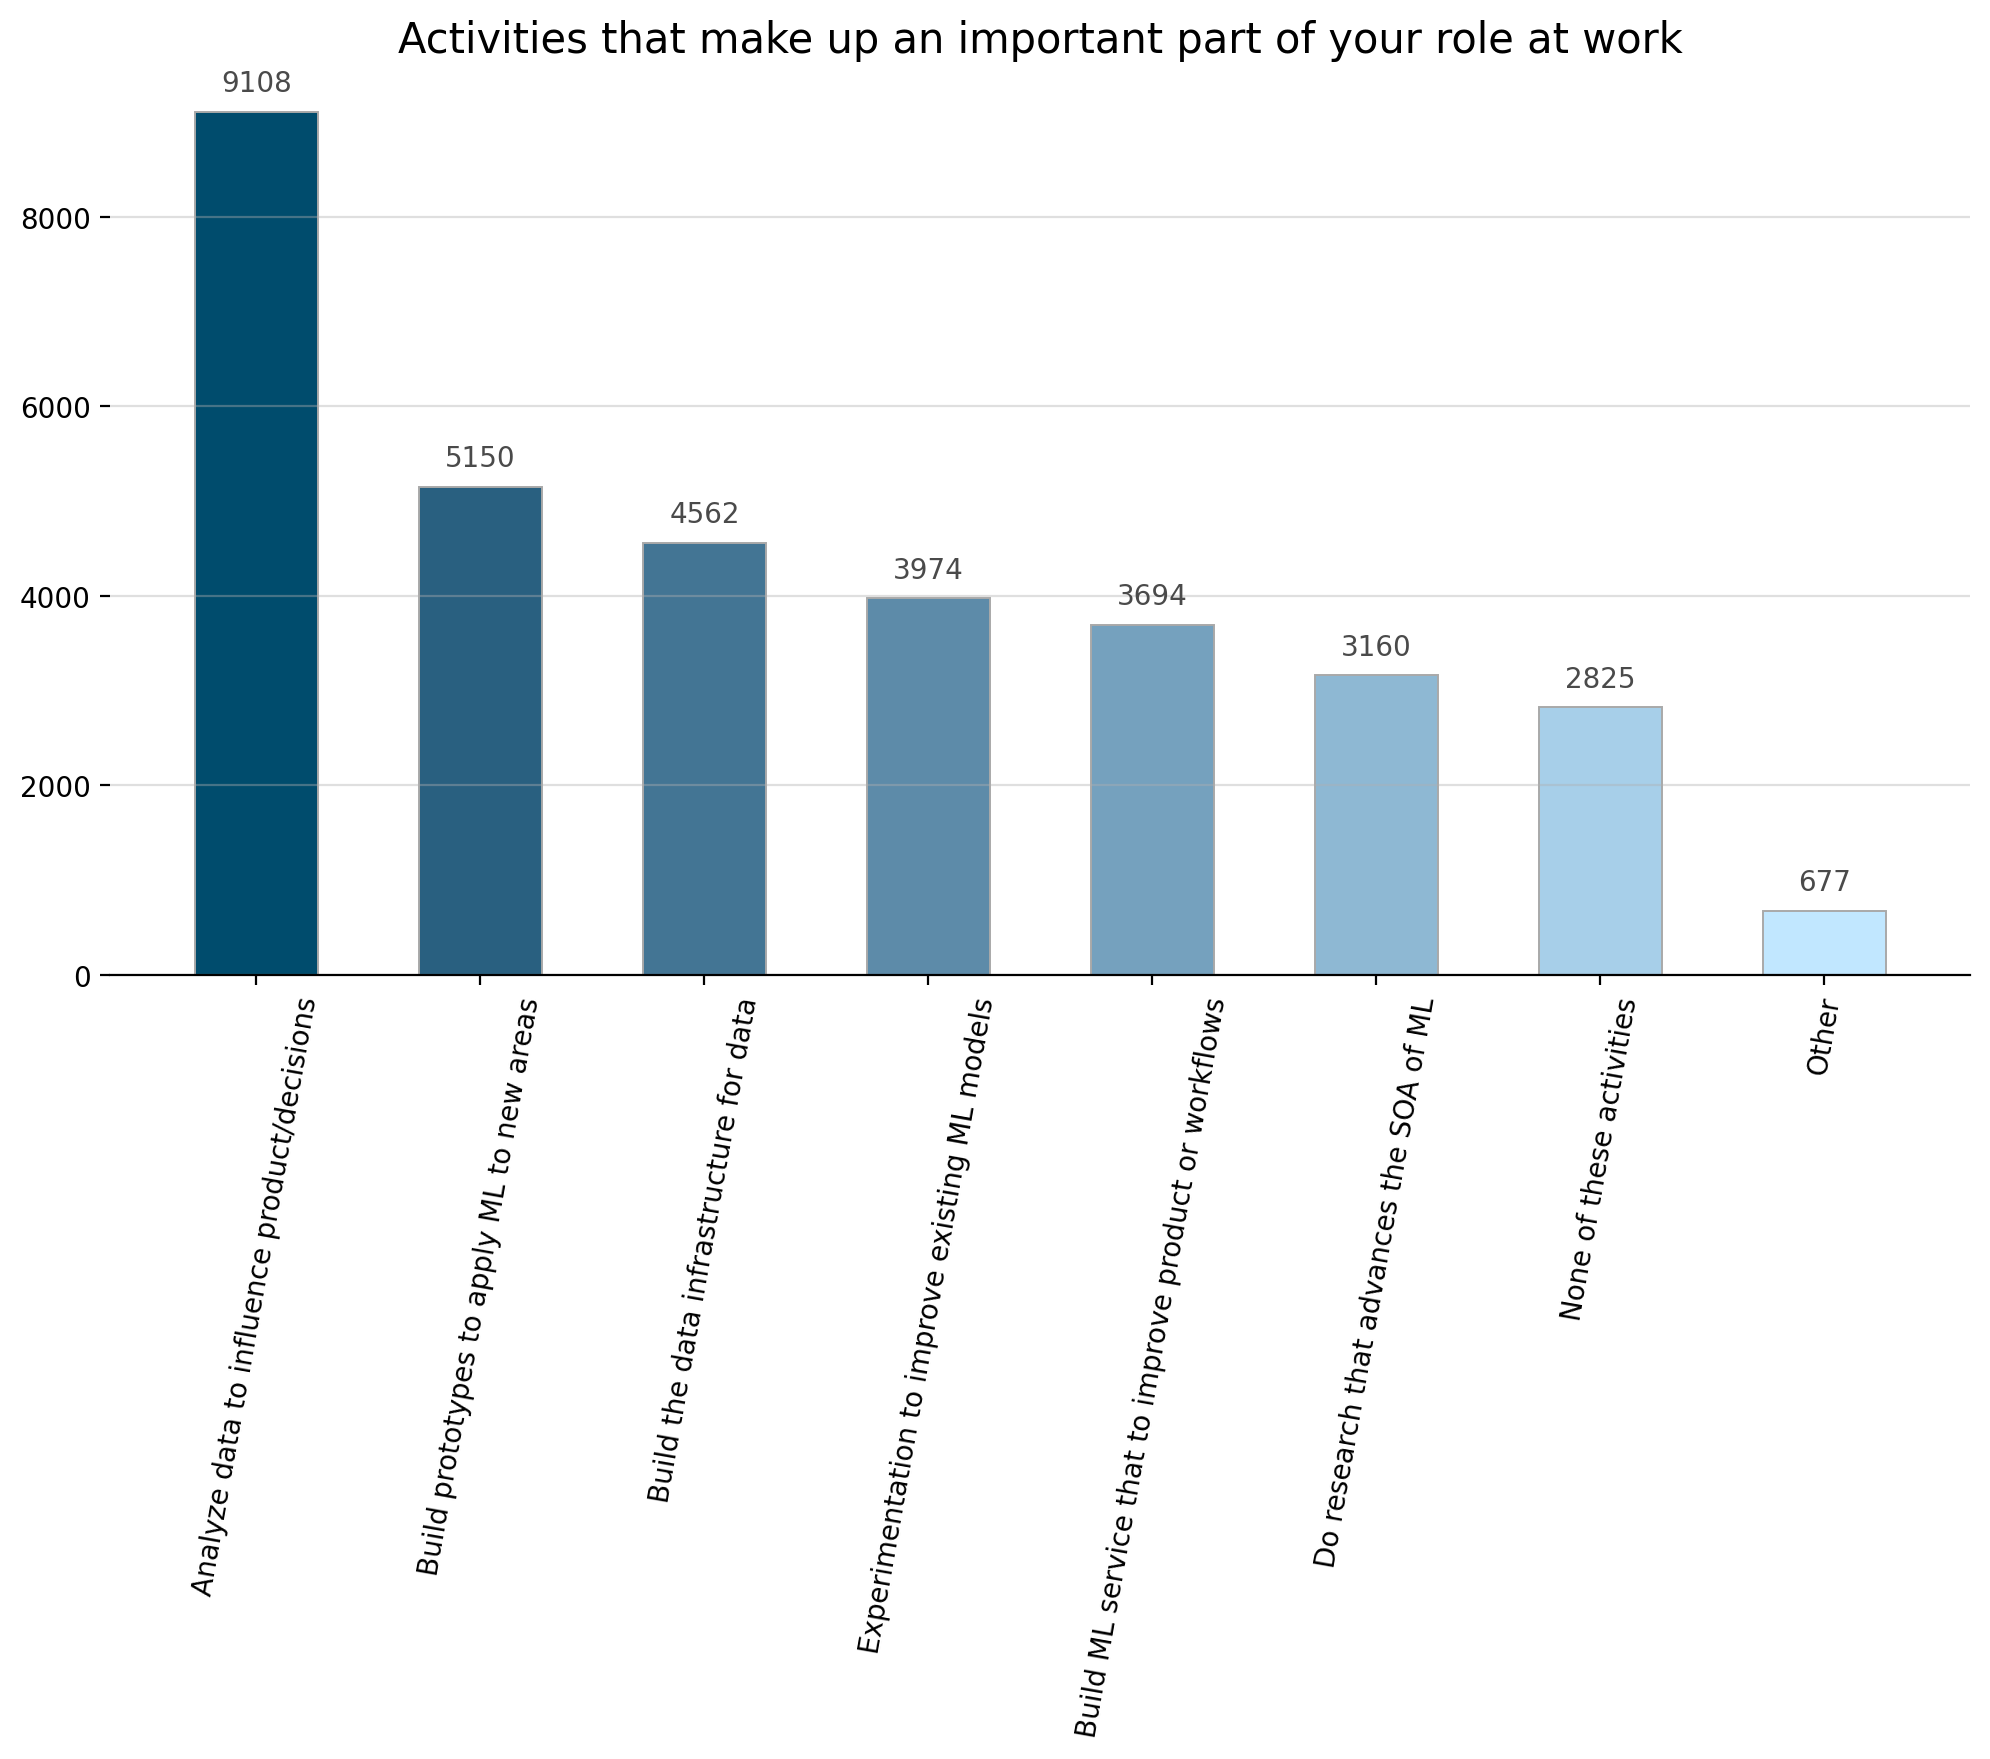

In [20]:
colors = ['#004c6d', '#296080', '#437594', '#5d8ba9', '#75a1be', '#8eb8d3', '#a7cfe9', '#c1e7ff']
# colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
q24_dictionary_of_counts_2021 = dict(sorted(q24_dictionary_of_counts_2021.items(), key=lambda item: item[1], reverse=True))
ax.bar(q24_dictionary_of_counts_2021.keys(), q24_dictionary_of_counts_2021.values(), width=0.55, 
       edgecolor='darkgray', color=colors,
       linewidth=0.7)

for i in q24_dictionary_of_counts_2021.keys():
    ax.annotate(f"{q24_dictionary_of_counts_2021[i]}", 
                   xy=(i, q24_dictionary_of_counts_2021[i] + 300),
                   va = 'center', ha='center',fontweight='light', #fontfamily='serif',
                   color='#4a4a4a')


for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
labels = ['Analyze data to influence product/decisions', 'Build prototypes to apply ML to new areas',
'Build the data infrastructure for data',
'Experimentation to improve existing ML models', 'Build ML service that to improve product or workflows',
'Do research that advances the SOA of ML', 'None of these activities', 'Other']

ax.set_xticklabels(labels, rotation=80) #fontfamily='serif',)
plt.title('Activities that make up an important part of your role at work', fontsize=15,)# fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

I learned a lot from these notebooks:

* https://www.kaggle.com/paultimothymooney/2021-survey-job-title-data-scientist/notebook
* https://www.kaggle.com/ruchi798/kaggle-ml-ds-survey-analysis/notebook
* https://www.kaggle.com/paultimothymooney/2021-kaggle-data-science-machine-learning-survey/notebook
* https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis/notebook